In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('employee_churn_data.csv')

<p>"department" - the department the employee belongs to.<br>
"promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.<br>
"review" - the composite score the employee received in their last evaluation.<br>
"projects" - how many projects the employee is involved in.<br>
"salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.<br>
"tenure" - how many years the employee has been at the company.<br>
"satisfaction" - a measure of employee satisfaction from surveys.<br>
"bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.<br>
"avg_hrs_month" - the average hours the employee worked in a month.<br>
"left" - "yes" if the employee ended up leaving, "no" otherwise.</p>

<!-- "department" - the department the employee belongs to.
"promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
"review" - the composite score the employee received in their last evaluation.
"projects" - how many projects the employee is involved in.
"salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
"tenure" - how many years the employee has been at the company.
"satisfaction" - a measure of employee satisfaction from surveys.
"bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
"avg_hrs_month" - the average hours the employee worked in a month.
"left" - "yes" if the employee ended up leaving, "no" otherwise. -->

In [4]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [6]:
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [7]:
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(9540, 10)

In [10]:
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


<function matplotlib.pyplot.show(close=None, block=None)>

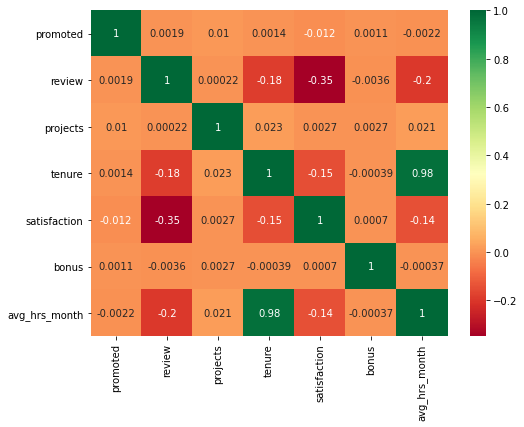

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn')
plt.show

In [12]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [13]:
df['department'].unique()

array(['operations', 'support', 'logistics', 'sales', 'IT', 'admin',
       'engineering', 'marketing', 'finance', 'retail'], dtype=object)

In [14]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [15]:
df['promoted'].unique()

array([0, 1], dtype=int64)

In [16]:
df['bonus'].unique()

array([0, 1], dtype=int64)

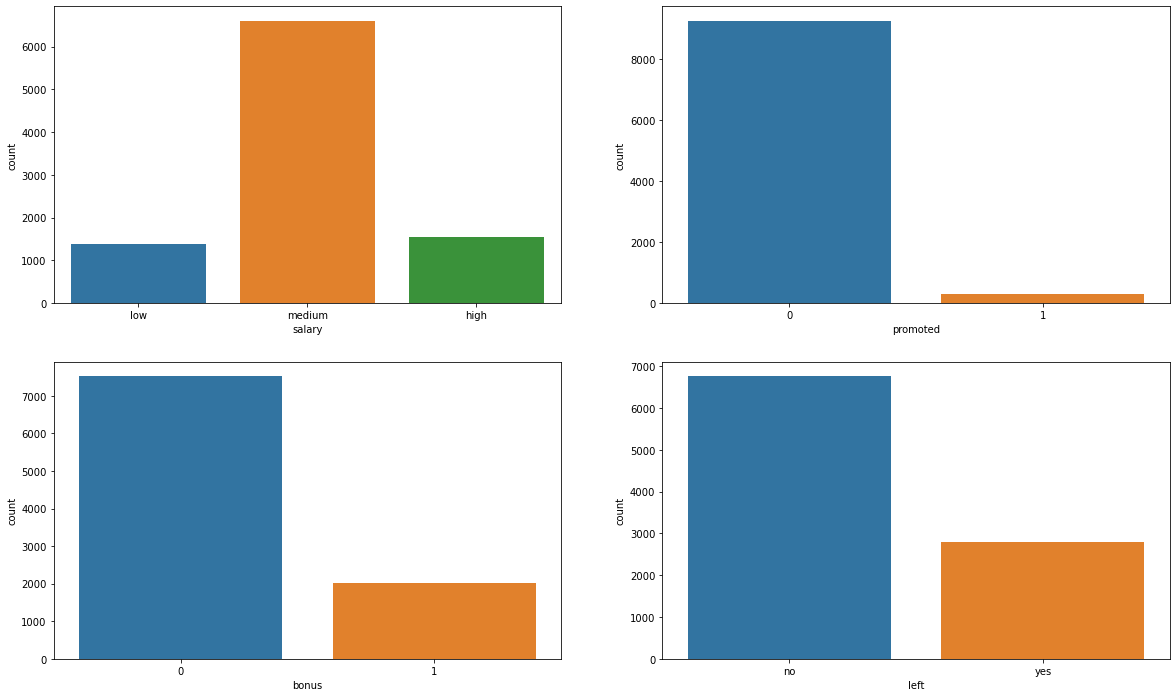

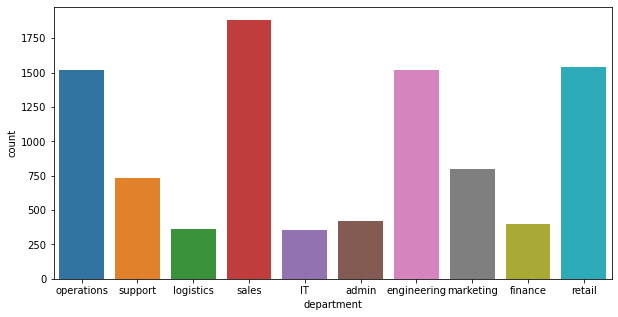

In [18]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x=df['salary'])

plt.subplot(2,2,2)
sns.countplot(x=df['promoted'])

plt.subplot(2,2,3)
sns.countplot(x=df['bonus'])

plt.subplot(2,2,4)
sns.countplot(x=df['left'])

plt.figure(figsize=(10,5))
sns.countplot(x=df['department'])

plt.show()

<AxesSubplot:xlabel='review', ylabel='Count'>

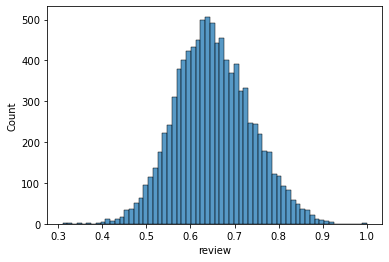

In [22]:
sns.histplot(x=df['review'])

<AxesSubplot:xlabel='tenure', ylabel='Count'>

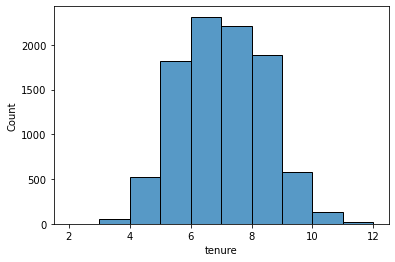

In [23]:
sns.histplot(x=df['tenure'],bins=12,binwidth=1)

<AxesSubplot:xlabel='satisfaction', ylabel='Count'>

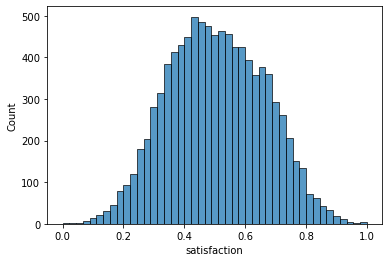

In [24]:
sns.histplot(x=df['satisfaction'])

<AxesSubplot:xlabel='avg_hrs_month', ylabel='Count'>

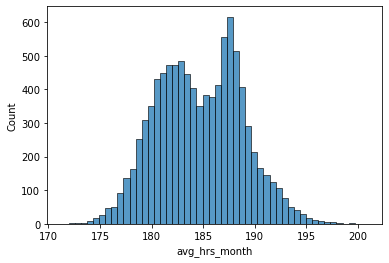

In [25]:
sns.histplot(x=df['avg_hrs_month'])

In [3]:
x = df.drop(columns=['left'])
y = df['left']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [23]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [6]:
traf1 = ColumnTransformer([
    ('ordinal_encoding_salary', OrdinalEncoder(categories= [['low','medium','high']]),[4]),
    ('one_hot_encoding_department', OneHotEncoder(sparse=False), [0])
], remainder = 'passthrough')

In [7]:
traf2 = ColumnTransformer([
    ('standard_scales', StandardScaler(),slice(0,18))
], remainder = 'passthrough')

In [8]:
traf3 = SelectKBest(k=10)

In [9]:
traf4 = HistGradientBoostingClassifier()

In [10]:
pipe = Pipeline([
    ('traf1',traf1),
    ('traf2',traf2),
    ('traf3',traf3),
    ('traf4',traf4)
])

In [11]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('traf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoding_salary',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  [4]),
                                                 ('one_hot_encoding_department',
                                                  OneHotEncoder(sparse=False),
                                                  [0])])),
                ('traf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scales',
                                                  StandardScaler(),
                                                  slice(0, 18, None))])),
                ('traf3', SelectKBest()),
                ('traf4', HistGradientBoostingClassifier())])

In [14]:


pipeline = pickle.dump(pipe,open("pipeline.pkl","wb"))

In [15]:
import pickle
pipeline = pickle.load(open("pipeline.pkl","rb"))
test = pipeline.predict([['operations',0,0.57,3,'low',5,0.62,0,180]])
print(test[0])


0


C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
C:\Users\abc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [24]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [72]:
lr = LogisticRegression()

lr.fit(X,y_train)

y_pred = lr.predict(test)
# print(lr.coef_[0][1])
for i in range(len(lr.coef_[0])):
    print(i,round(lr.coef_[0][i],4))
# print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
# print("Accuracy Score :", accuracy_score(y_test,y_pred))
# print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

# Confusion Matrix : [[1270   76]
#  [ 416  146]]
# Accuracy Score : 0.7421383647798742
# ROC AUC Score : 0.6016614405144014

0 -0.0171
1 0.0055
2 -0.0063
3 -0.0054
4 -0.0017
5 0.0187
6 0.0155
7 -0.0181
8 0.0225
9 -0.0171
10 -0.0006
11 -0.0832
12 0.9582
13 -0.0621
14 0.1217
15 0.3926
16 -0.03
17 0.1512


In [70]:
len(lr.coef_[0])

18

In [43]:
svc = SVC()

svc.fit(X,y_train)

y_pred1 = svc.predict(test)
y_pred1
# print("Confusion Matrix :", confusion_matrix(y_test,y_pred1))
# print("Accuracy Score :", accuracy_score(y_test,y_pred1))
# print("ROC AUC Score :", roc_auc_score(y_test,y_pred1))

array([0])

In [44]:
knc = KNeighborsClassifier()

knc.fit(X,y_train)

y_pred2 = knc.predict(test)
y_pred2
# print("Confusion Matrix :", confusion_matrix(y_test,y_pred2))
# print("Accuracy Score :", accuracy_score(y_test,y_pred2))
# print("ROC AUC Score :", roc_auc_score(y_test,y_pred2))

array([0])

In [ ]:
dtc = DecisionTreeClassifier(max_depth=7)

dtc.fit(X,y_train)

y_pred3 = dtc.predict(test)
y_pred3
# print("Confusion Matrix :", confusion_matrix(y_test,y_pred3))
# print("Accuracy Score :", accuracy_score(y_test,y_pred3))
# print("ROC AUC Score :", roc_auc_score(y_test,y_pred3))

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X,y_train)

y_pred4 = rfc.predict(test)
y_pred4
# print("Confusion Matrix :", confusion_matrix(y_test,y_pred4))
# print("Accuracy Score :", accuracy_score(y_test,y_pred4))
# print("ROC AUC Score :", roc_auc_score(y_test,y_pred4))

In [ ]:
gbc = GradientBoostingClassifier()

gbc.fit(X,y_train)

y_pred5 = gbc.predict(test)
y_pred5
# print("Confusion Matrix :", confusion_matrix(y_test,y_pred5))
# print("Accuracy Score :", accuracy_score(y_test,y_pred5))
# print("ROC AUC Score :", roc_auc_score(y_test,y_pred5))

In [ ]:


hgbc = HistGradientBoostingClassifier()

hgbc.fit(X,y_train)

y_pred6 = hgbc.predict(test)
y_pred6
# print("Confusion Matrix :", confusion_matrix(y_test,y_pred6))
# print("Accuracy Score :", accuracy_score(y_test,y_pred6))
# print("ROC AUC Score :", roc_auc_score(y_test,y_pred6))

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

xgbc.fit(x_train_traf,y_train)

y_pred7 = xgbc.predict(x_test_traf)

print("Confusion Matrix :", confusion_matrix(y_test,y_pred7))
print("Accuracy Score :", accuracy_score(y_test,y_pred7))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred7))

In [ ]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier()

lgbmc.fit(x_train_traf,y_train)

y_pred8 = lgbmc.predict(x_test_traf)

print("Confusion Matrix :", confusion_matrix(y_test,y_pred8))
print("Accuracy Score :", accuracy_score(y_test,y_pred8))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred8))

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(verbose=0, n_estimators=175)

cbc.fit(X,y_train)

y_pred9 = cbc.predict(test)
y_pred9
print("Confusion Matrix :", confusion_matrix(y_test,y_pred9))
print("Accuracy Score :", accuracy_score(y_test,y_pred9))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred9))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train_traf, y_train, scoring='accuracy', cv=cv, n_jobs=4, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(cbc, x_train_traf, y_train, scoring='accuracy', cv=cv, n_jobs=4, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))